In [1]:
import keras
import lime
import os
import random
import cv2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.preprocessing.image import load_img, img_to_array
from lime.wrappers.scikit_image import SegmentationAlgorithm
from skimage.color import label2rgb
from lime import lime_image
from PIL import ImageFilter, ImageEnhance, Image
from skimage.segmentation import mark_boundaries


class LimeAnalyser:
    def __init__(self):
        self._data = pd.read_csv('all_outputs.csv')
        self._tagged_data_path = '/home/mdrzewiecki/mim/BreastCancerAnalysis/data/'
        self._choose_tagged_sample()
        self._setup_sample_files()
        self._setup_explainer()
        self._positive_label = "Cancer"
        self._negative_label = "Healthy"
        
    @property
    def x(self):
        return self._x
    
    @property
    def y(self):
        return self._y
    
    @property
    def model(self):
        return self._model
    
    @property
    def segmenter(self):
        return self._segmenter
    
    def pred_fn(self, sample):
        return self._model.predict(sample)
    
    def explain_tagged_files(self, count, min_weight, num_samples):
        selected_ids = np.random.randint(0, 1000, count)
        _, sample_file_name = os.path.split(self._chosen_image_path)
        image = Image.open(self._chosen_image_path)
        ground_truth = Image.open(self._chosen_image_ground_truth)
        for i in selected_ids:
            print(f"file: {sample_file_name}, sample: {i}")
            
            image_part = image.crop((i, i, i + 50, i + 50))
            ground_truth_part = ground_truth.crop((i, i, i + 50, i + 50))
            ground_truth_part = ground_truth_part.resize((360, 360))
            image_part = np.array(image_part)

            explanation = self._explainer.explain_instance(
                image_part, self.pred_fn, top_labels=5, num_samples=num_samples, segmentation_fn=analyzer.segmenter, hide_color=0)
            print(explanation.local_exp)
            temp0, mask0 = explanation.get_image_and_mask(
                explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.01)

            temp, mask = explanation.get_image_and_mask(
                explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.004)

            temp2, mask2 = explanation.get_image_and_mask(
                explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.003)

            temp3, mask3 = explanation.get_image_and_mask(
                explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.002)

            temp4, mask4 = explanation.get_image_and_mask(
                explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.001)

            temp5, mask5 = explanation.get_image_and_mask(
                explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.0005)

            image_part = Image.fromarray(image_part)
            image_part = tf.convert_to_tensor(image_part)
            image_part = image_part[None, :, :, :]
            image_part = image_part.numpy()
            print(f"prediction={self._model.predict(image_part)}")
            
            explanation_img0 = Image.fromarray(temp0.astype(np.uint8))
            explanation_img0 = explanation_img0.resize((360, 360))
            
            explanation_img = Image.fromarray(temp.astype(np.uint8))
            explanation_img = explanation_img.resize((360, 360))

            explanation_img2 = Image.fromarray(temp2.astype(np.uint8))
            explanation_img2 = explanation_img2.resize((360, 360))

            explanation_img3 = Image.fromarray(temp3.astype(np.uint8))
            explanation_img3 = explanation_img3.resize((360, 360))

            explanation_img4 = Image.fromarray(temp4.astype(np.uint8))
            explanation_img4 = explanation_img4.resize((360, 360))

            explanation_img5 = Image.fromarray(temp5.astype(np.uint8))
            explanation_img5 = explanation_img5.resize((360, 360))

            result0 = Image.fromarray(np.array(explanation_img0))
            display(result0)

            result = Image.fromarray(np.array(explanation_img))
            display(result)

            result2 = Image.fromarray(np.array(explanation_img2))
            display(result2)

            result3 = Image.fromarray(np.array(explanation_img3))
            display(result3)

            result4 = Image.fromarray(np.array(explanation_img4))
            display(result4)

            result5 = Image.fromarray(np.array(explanation_img0))
            display(result5)

            result6 = Image.fromarray(np.array(ground_truth_part))
            display(result6)
    
                        
            print("========================================================")
            
    
    def explain_sample_files(self, num_samples=500):
        explanation = explainer.explain_instance(
            analyzer.x[0], 
            classifier_fn=analyzer.model.predict,
            top_labels=2,
            hide_color=0, 
            num_samples=num_samples, 
            segmentation_fn=analyzer.segmenter)
        temp, mask = explanation.get_image_and_mask(analyzer.y[0], positive_only=True, num_features=5, hide_rest=False)
        fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))
        ax1.imshow(mask,temp, interpolation = 'nearest')
        ax1.set_title('Positive Regions for {}'.format(analyzer.y[0]))
        temp, mask = explanation.get_image_and_mask(y[0], positive_only=False, num_features=10, hide_rest=False)
        ax2.imshow(label2rgb(3-mask,temp, bg_label = 0), interpolation = 'nearest')
        ax2.set_title('Positive/Negative Regions for {}'.format(analyzer.y[0]))
    
    def _choose_tagged_sample(self):
        self._data_original_images_dir = os.path.join(self._tagged_data_path, 'images')
        self._data_ground_truth_dir = os.path.join(self._tagged_data_path, 'groundTruth_display')
        cases = next(os.walk(self._data_original_images_dir))[2]
        chosen_tagged_image = cases[random.randint(0, len(cases))]
        chosen_tagged_ground_truth = os.path.splitext(chosen_tagged_image)[0]+'.png'
        self._chosen_image_path = os.path.join(self._data_original_images_dir, chosen_tagged_image)
        self._chosen_image_ground_truth = os.path.join(self._data_ground_truth_dir, chosen_tagged_ground_truth)
    
    def _setup_sample_files(self):
        self._false_predictions = self._data.loc[(self._data["pred_y"] > 0.5) != self._data["true_y"]]
        self._false_positives = self._false_predictions.loc[self._false_predictions["pred_y"] > 0.5]
        self._false_negatives = self._false_predictions.loc[self._false_predictions["pred_y"] < 0.5]
        self._false_positive_files = self._false_positives['# file']
        self._false_negative_files = self._false_negatives['# file']
        self._false_negatives_sample = np.random.randint(0, len(self._false_negative_files), 2)
        self._false_positives_sample = np.random.randint(0, len(self._false_positive_files), 2)
        self._false_negative_sample_files = self._false_negative_files.iloc[self._false_negatives_sample]
        self._false_positive_sample_files = self._false_positive_files.iloc[self._false_positives_sample]
        self._sample_files = self._false_positive_sample_files._append(self._false_negative_sample_files)
        self._load_data(self._sample_files, end=4)
    
    def _load_data(self, files, start=0, end=10, augment_fn=None):
        X = []
        y = []
        for f in files[start:end]:
            print(f'LimeAnalyser._load_data(): Loading file {f}')
            img = load_img(f, target_size=(50, 50))
            if augment_fn is not None:
                sample = augment_fn(img)
            else:    
                sample = tf.convert_to_tensor(img)
            X.append(sample)
            y.append(f[-5])
        self._x = np.stack(X)
        self._y = np.array(y, dtype=float)
    
    def _setup_explainer(self):
        self._model = keras.models.load_model("../models/CanDetect.keras")
        self._explainer = lime_image.LimeImageExplainer(verbose=False)
        self._segmenter = SegmentationAlgorithm('slic', n_segments=100, compactness=1, sigma=1)

analyzer = LimeAnalyser()

2024-01-26 01:53:58.897566: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-26 01:53:58.899023: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-26 01:53:58.921504: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-26 01:53:58.921530: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-26 01:53:58.922107: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

LimeAnalyser._load_data(): Loading file ../data/10254/0/10254_idx5_x1551_y1351_class0.png
LimeAnalyser._load_data(): Loading file ../data/9175/0/9175_idx5_x201_y251_class0.png
LimeAnalyser._load_data(): Loading file ../data/13916/1/13916_idx5_x2001_y801_class1.png
LimeAnalyser._load_data(): Loading file ../data/12626/1/12626_idx5_x1401_y851_class1.png


file: Case_12-10.tif, sample: 6


  0%|          | 0/300 [00:00<?, ?it/s]

1/1 [==============================] - 0s 92ms/step
{0: [(60, 0.008303790712899406), (31, 0.007417748262995245), (26, 0.007355520129666769), (52, 0.007346984253596507), (41, 0.0070338476142379185), (6, 0.006860226601741341), (5, 0.006694282656978615), (47, 0.0066445102852556535), (17, 0.006506953254577789), (19, 0.006495353570221247), (27, 0.006444426508395974), (29, 0.006409414380093077), (45, 0.00634583304710173), (25, 0.006324334854720572), (70, 0.006207164596636203), (3, 0.005794566346715515), (61, 0.005709455866075074), (54, 0.0056264760962908104), (66, 0.005567766885157262), (55, 0.005486153772719693), (21, 0.005365886888950424), (67, 0.0052711477038237045), (53, 0.005227953022860307), (4, 0.005125457015767397), (63, 0.005000009345749353), (58, 0.00478088441150833), (42, 0.004744763111284877), (51, 0.004737674297789455), (40, 0.004686293903198949), (8, 0.004642066675798143), (57, 0.004547234994361919), (23, 0.004534677158821231), (35, 0.004489437011618933), (12, 0.004410708717671

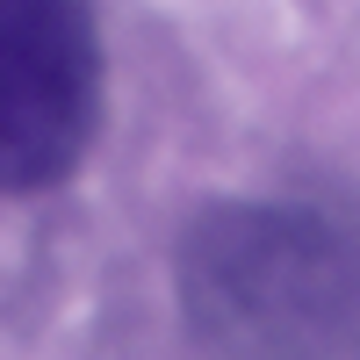

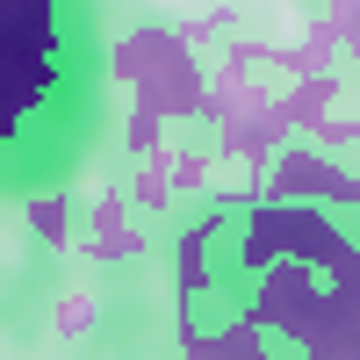

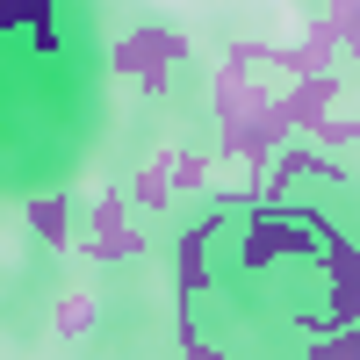

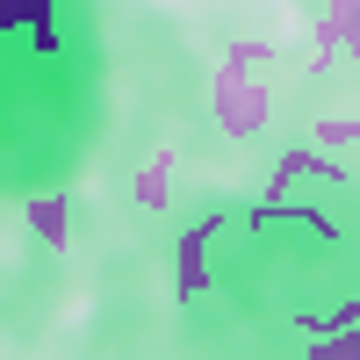

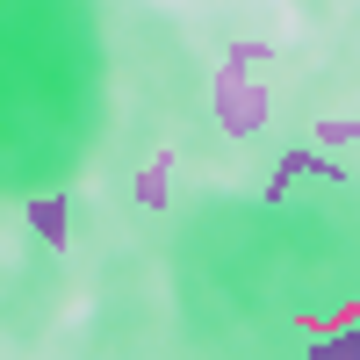

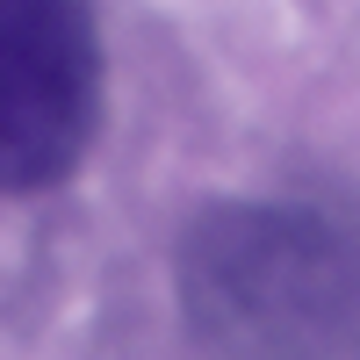

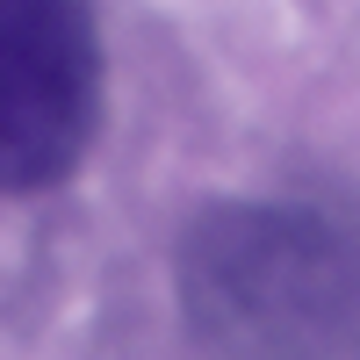

file: Case_12-10.tif, sample: 959


  0%|          | 0/300 [00:00<?, ?it/s]

1/1 [==============================] - 0s 83ms/step
{0: [(0, 0.0214684904986538), (21, 0.01928499737123614), (65, 0.019242030561303133), (66, 0.01894893892158642), (1, 0.018274355160353632), (2, 0.01712114601440773), (6, 0.016831794962611706), (28, 0.01662870144845424), (32, 0.01655796730789064), (56, 0.0163606794470299), (48, 0.01592523725207212), (53, 0.015849796641498198), (71, 0.01578796032467832), (5, 0.014860859363377693), (62, 0.014817493733166093), (43, 0.01406590119321487), (58, 0.013433381919363075), (33, 0.013207607204201482), (10, 0.013049464022869472), (36, 0.013036171959530213), (20, 0.013004678035932955), (44, 0.012881413198235117), (18, 0.012673539358858054), (13, 0.01263749392228334), (69, 0.012432763967739853), (73, 0.012381542086355815), (9, 0.012334125278337512), (4, 0.011979112246843605), (51, 0.011955097961326464), (34, 0.011394803607366558), (47, 0.01111029963995686), (68, 0.010524014837130346), (39, 0.010287173100993693), (70, 0.010119786091371827), (49, 0.00886

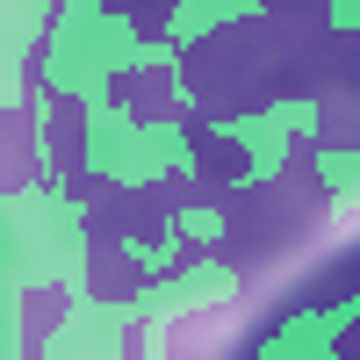

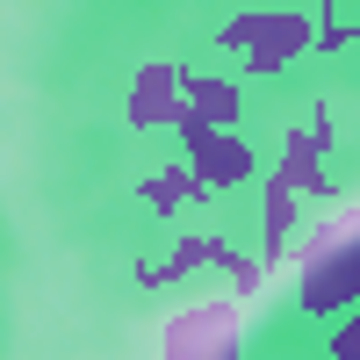

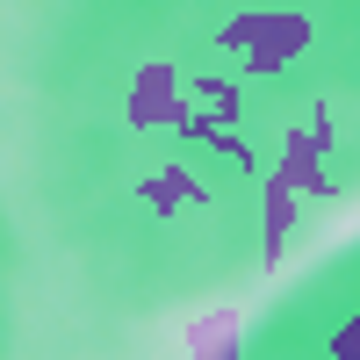

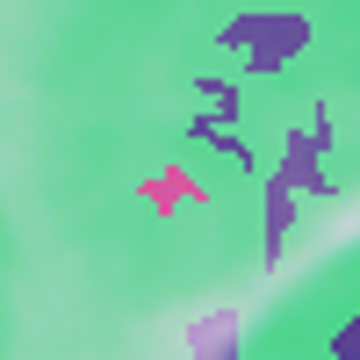

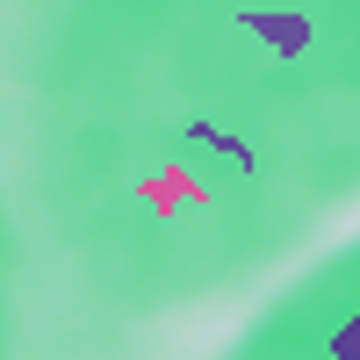

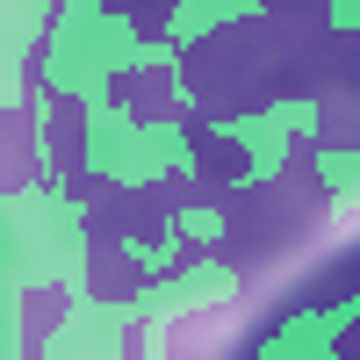

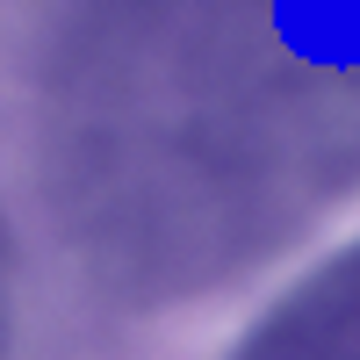

file: Case_12-10.tif, sample: 472


  0%|          | 0/300 [00:00<?, ?it/s]

1/1 [==============================] - 0s 82ms/step
{0: [(3, 0.0011171103294216216), (29, 0.0010217331536493785), (15, 0.0010000116570404345), (59, 0.0009418240535723494), (20, 0.0008595448105731613), (1, 0.0008270490704781793), (32, 0.0008249864466800945), (19, 0.000808332903584155), (40, 0.0007947608168650866), (57, 0.0007827351901960676), (22, 0.0007675790528420894), (2, 0.0007671315861545935), (0, 0.0007551251853825147), (39, 0.0007519182915552532), (41, 0.0007518469710733251), (38, 0.0007507600868723787), (7, 0.0007454363516383765), (64, 0.0007415258446898148), (34, 0.0007105431897658651), (46, 0.0006595638847670229), (21, 0.0006576511911127879), (28, 0.0006471053490219435), (18, 0.0006038150811844462), (54, 0.0005991137747878285), (51, 0.0005951344509564255), (31, 0.0005529777630092072), (12, 0.0005432964904214261), (42, 0.0005348455117557127), (48, 0.0005337143830132433), (44, 0.0005278122829422033), (61, 0.000522994263420864), (24, 0.0005206358582292797), (11, 0.000519569538233

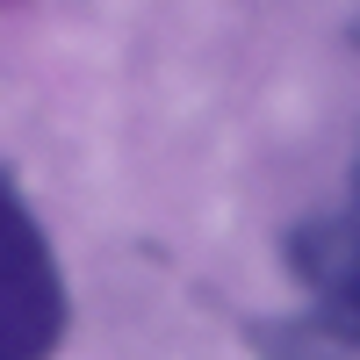

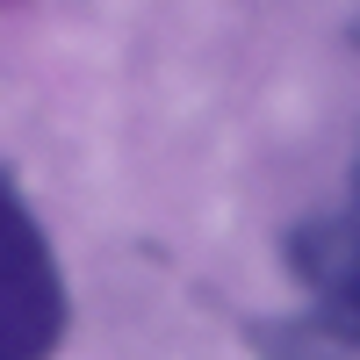

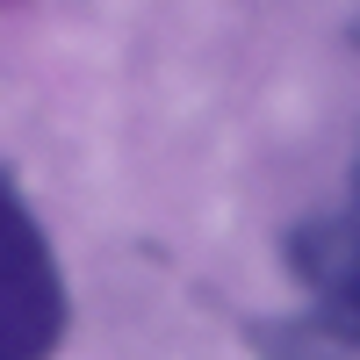

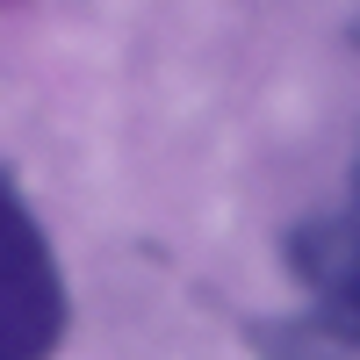

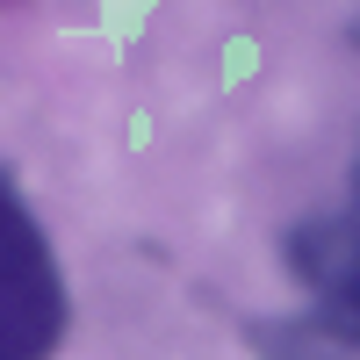

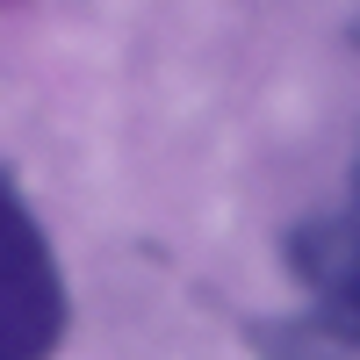

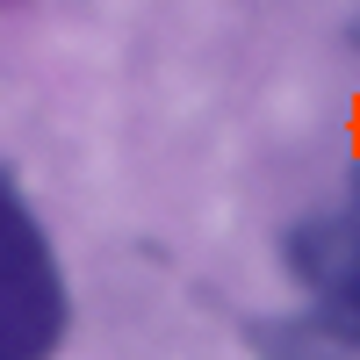

file: Case_12-10.tif, sample: 231


  0%|          | 0/300 [00:00<?, ?it/s]

1/1 [==============================] - 0s 84ms/step
{0: [(71, 0.00021110206563551822), (74, 0.0002050493249206693), (65, 0.0001846528207160734), (67, 0.00018191059296162172), (59, 0.00018138331018178937), (33, 0.00017086432707482906), (78, 0.00017017589295247615), (26, 0.00016957032207227512), (76, 0.00016584296309898772), (5, 0.00016469555786868755), (8, 0.00016407619800534008), (7, 0.00016010927089221013), (34, 0.00015957823718486364), (10, 0.00015851005646248443), (29, 0.00015640402222247258), (32, 0.00015101945238431852), (60, 0.00015029952585293648), (27, 0.00014723253272342583), (37, 0.00014198360488914638), (12, 0.00014023090987169958), (75, 0.00013982084291616048), (15, 0.00013558015652451029), (73, 0.00013098253544315311), (14, 0.00013043601133360918), (43, 0.00013027951296233986), (53, 0.00013025973748072327), (24, 0.00012875880630504956), (56, 0.00012303959974209697), (42, 0.00011950501940773432), (4, 0.00011853189538687082), (1, 0.00011835279288912509), (62, 0.0001152439147

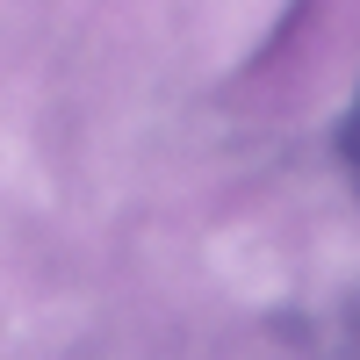

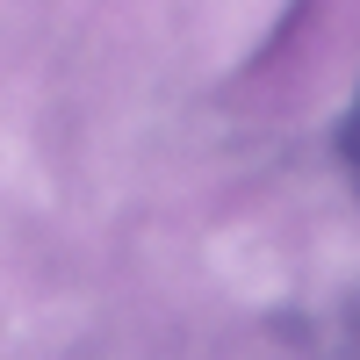

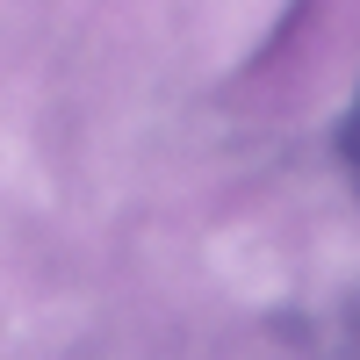

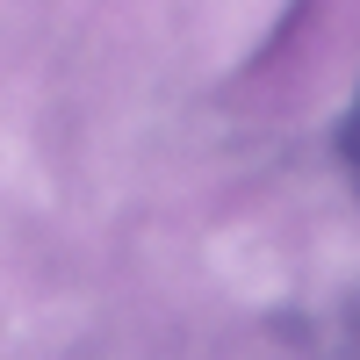

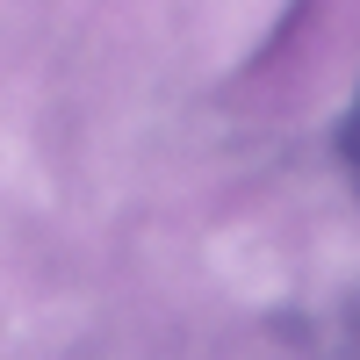

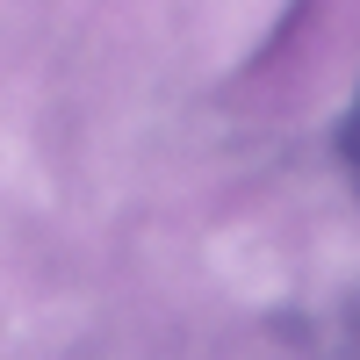

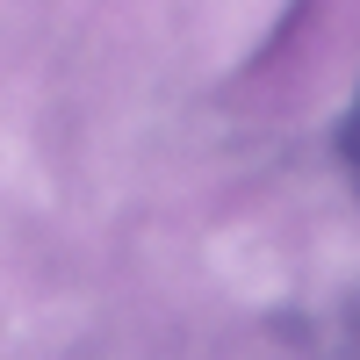

file: Case_12-10.tif, sample: 949


  0%|          | 0/300 [00:00<?, ?it/s]

1/1 [==============================] - 0s 91ms/step
{0: [(45, 0.020795809509782208), (40, 0.019042835903989693), (25, 0.019033904022594413), (35, 0.018009137305748105), (62, 0.017130380127571586), (29, 0.01629694532608374), (52, 0.01612258493950578), (59, 0.01609240870244899), (11, 0.016066816349328068), (1, 0.015740399313995346), (26, 0.015469650761890502), (31, 0.015207356523319454), (9, 0.015014618104211463), (24, 0.014792683616544663), (46, 0.01468149940396997), (4, 0.014651667104061385), (61, 0.01455901459593953), (49, 0.014535563629386329), (38, 0.014515674766539588), (64, 0.014481709659421414), (67, 0.01441789416872071), (50, 0.014403635451767817), (51, 0.01438336320322721), (6, 0.013032466355451085), (39, 0.012979516003394087), (12, 0.012918360996765545), (66, 0.0127885096121292), (30, 0.012669123566647426), (28, 0.012426770948550768), (7, 0.01190098765791333), (44, 0.011530076849324602), (41, 0.011298673992408987), (71, 0.010870336992135502), (69, 0.010581490100892498), (33, 0

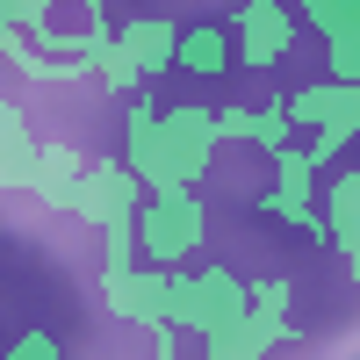

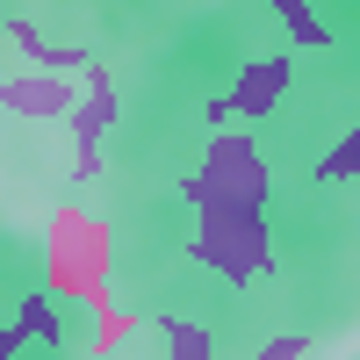

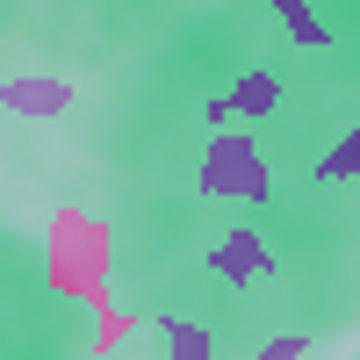

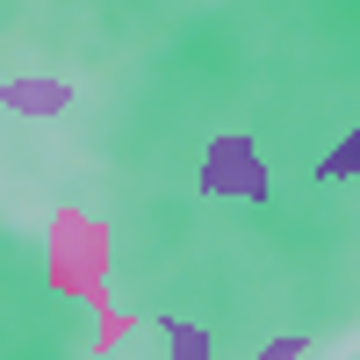

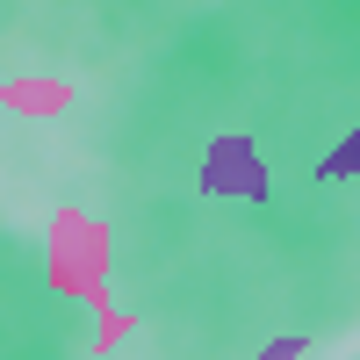

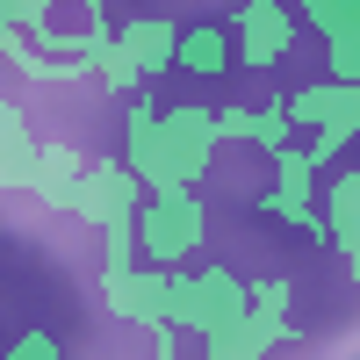

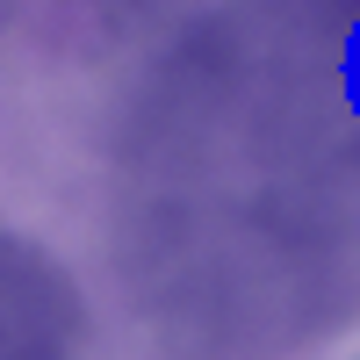

file: Case_12-10.tif, sample: 922


  0%|          | 0/300 [00:00<?, ?it/s]

1/1 [==============================] - 0s 86ms/step
{0: [(46, 0.023895812560200225), (15, 0.019486618523035952), (66, 0.01748935000017809), (41, 0.01564888540388961), (20, 0.014999901162320734), (30, 0.01359266405243956), (3, 0.012964789521579636), (64, 0.01272774177505276), (53, 0.012723909244685598), (14, 0.01263927583429652), (59, 0.012335437452184494), (42, 0.0123076996966347), (43, 0.011460853183474985), (65, 0.0114192061885314), (63, 0.011191607149476271), (31, 0.011009564147876863), (24, 0.010863037108890158), (45, 0.010727059906965312), (34, 0.01062613584339588), (73, 0.010327542679985893), (21, 0.010282585103864124), (7, 0.010181390379576449), (69, 0.010093788303077986), (9, 0.010007005286173778), (23, 0.010000057129607104), (4, 0.009985014372907688), (25, 0.0099828299914763), (22, 0.009576907812977827), (68, 0.009473423573454466), (51, 0.009083391745170335), (75, 0.009061881086987696), (40, 0.00904141347719988), (48, 0.008845998629892724), (2, 0.00865792486789116), (11, 0.008

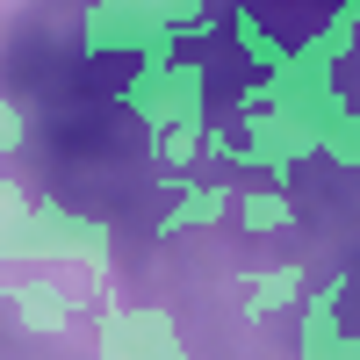

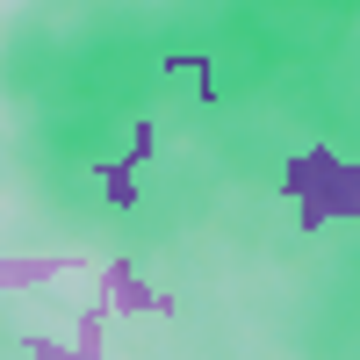

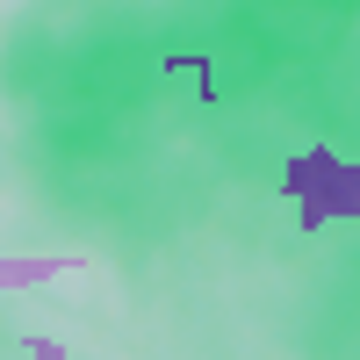

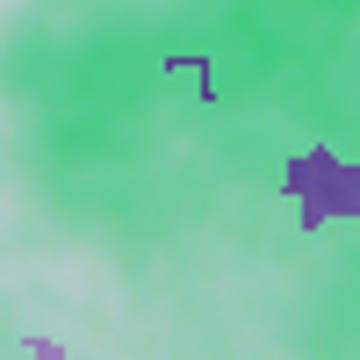

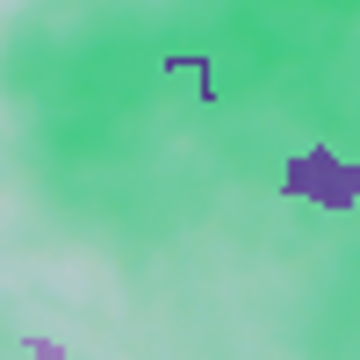

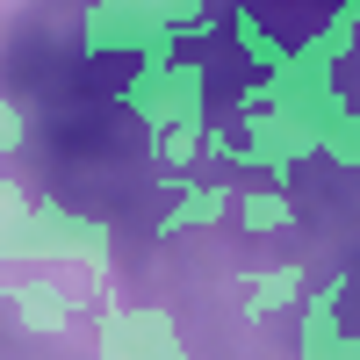

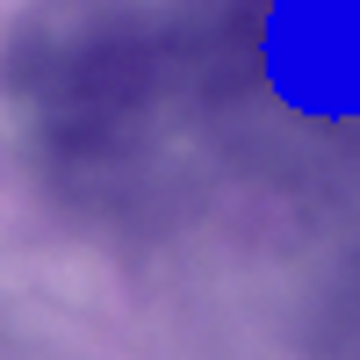

file: Case_12-10.tif, sample: 592


  0%|          | 0/300 [00:00<?, ?it/s]

1/1 [==============================] - 0s 85ms/step
{0: [(24, 0.023372322304064927), (48, 0.019496807662533297), (4, 0.018541330326533552), (37, 0.017722079473319812), (51, 0.017199562612958456), (54, 0.016824973282406314), (42, 0.014848760194377324), (21, 0.014830888943627368), (52, 0.014813792546408182), (13, 0.014309912353541614), (67, 0.014212146555498515), (5, 0.013919190544266753), (35, 0.013716301167657693), (49, 0.013679243029010801), (61, 0.013271374579618979), (32, 0.013241280010435891), (11, 0.013211575994238885), (46, 0.013183994063021181), (33, 0.0130265801862591), (16, 0.012884503465573224), (14, 0.012839273875518729), (50, 0.012662417236766674), (9, 0.012564538669037822), (64, 0.012325894725684313), (38, 0.012194966869057772), (59, 0.011923268979233686), (62, 0.011864228017114975), (40, 0.0118635799761151), (65, 0.011771603031326634), (2, 0.011629989002909284), (39, 0.01153516283612895), (53, 0.01146673954966659), (66, 0.011456979979717289), (47, 0.011454375522405573), (

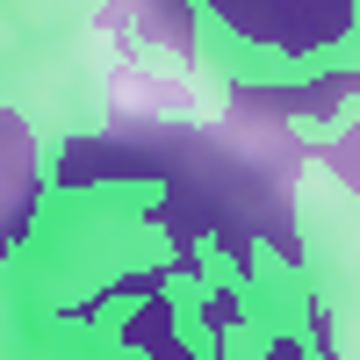

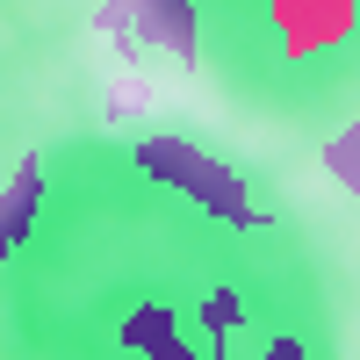

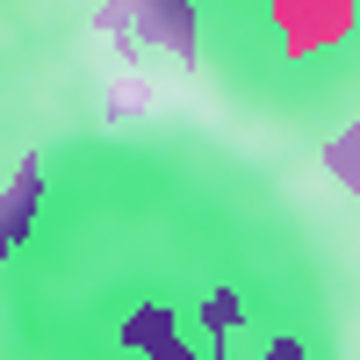

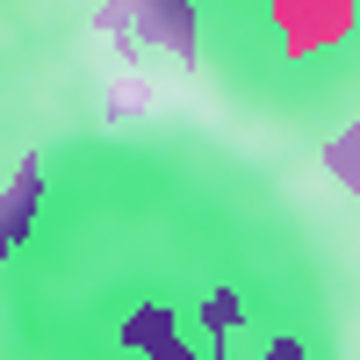

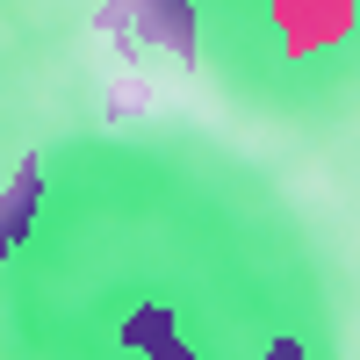

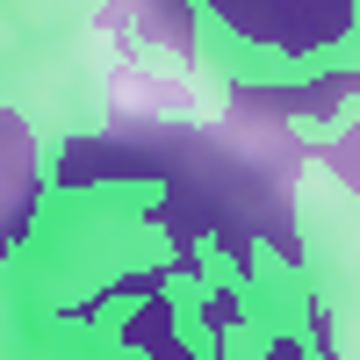

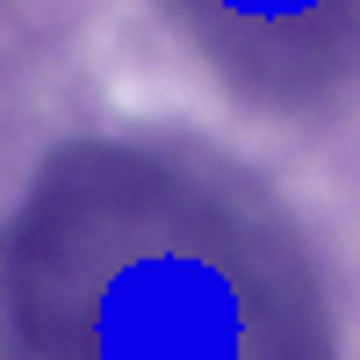

file: Case_12-10.tif, sample: 509


  0%|          | 0/300 [00:00<?, ?it/s]

1/1 [==============================] - 0s 91ms/step
{0: [(65, 0.022851848452404285), (11, 0.02071916157393206), (32, 0.019988118593728572), (2, 0.017970160880925123), (5, 0.017827434915212978), (35, 0.01669551715400975), (40, 0.016193412591044662), (7, 0.015424093382373596), (13, 0.015043318263768856), (0, 0.014582193668295374), (8, 0.01451843874889649), (42, 0.014300833718175908), (72, 0.014200012367428908), (15, 0.01411272260378402), (69, 0.013977449565786452), (18, 0.013969678164688176), (52, 0.012426943380301526), (46, 0.011850238401210914), (75, 0.011707613862588971), (9, 0.011607748143731203), (53, 0.011560497480703697), (57, 0.011076874316938268), (58, 0.01106694686517685), (28, 0.010900856619873132), (70, 0.01033276748146138), (67, 0.010110953019815455), (74, 0.009865812307756724), (21, 0.009744534430137394), (54, 0.009421803885171075), (48, 0.009287252578543787), (6, 0.009193079805611688), (68, 0.009175386828537134), (59, 0.008888403097733887), (17, -0.00878495224643603), (41,

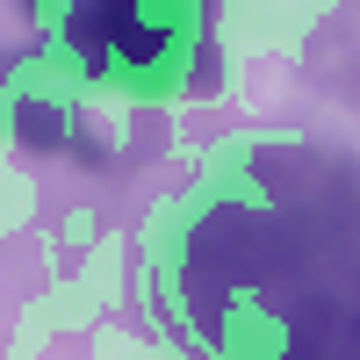

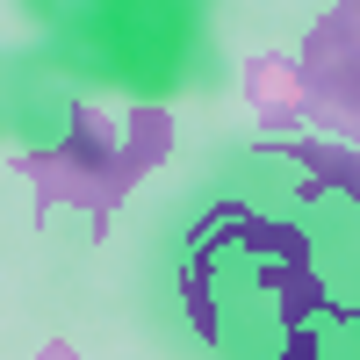

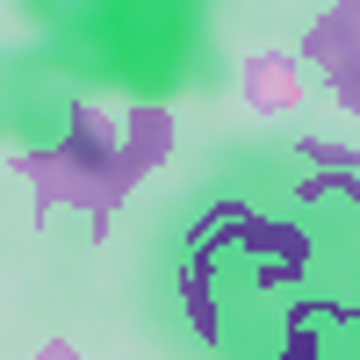

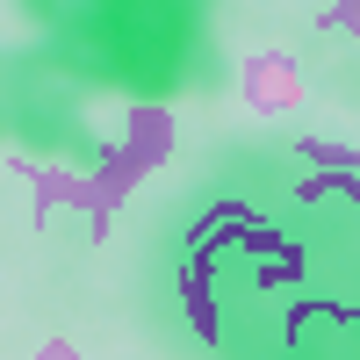

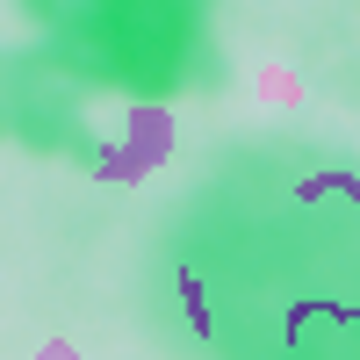

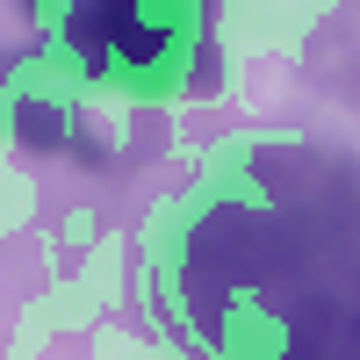

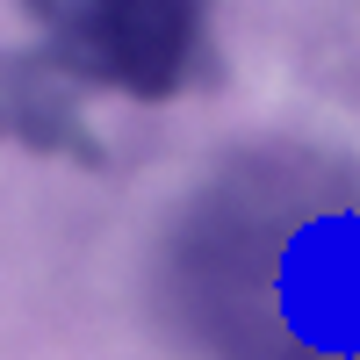

file: Case_12-10.tif, sample: 108


  0%|          | 0/300 [00:00<?, ?it/s]

1/1 [==============================] - 0s 87ms/step
{0: [(58, 0.004236641142220029), (41, 0.004086422654699093), (8, 0.0037359570929723033), (29, 0.0036834111437008114), (56, 0.0036795614204555536), (35, 0.003597360726728951), (14, 0.0034912319352223605), (4, 0.003400899260394643), (45, 0.0033236663866701007), (46, 0.003238180775333852), (44, 0.0032119255096156587), (71, 0.0032089647500115393), (65, 0.0032074969322454503), (6, 0.0031678532269395544), (75, 0.003139547882345498), (64, 0.003138356200298597), (67, 0.0030499777299048208), (11, 0.003043366241639747), (20, 0.0029926694925484446), (68, 0.0029894624495459005), (62, 0.0029848445360664212), (18, 0.0029091901415348883), (63, 0.0028115330768144005), (9, 0.0026910668966351474), (2, 0.0026903167102802867), (13, 0.0026621335572352836), (49, 0.002577597986091431), (16, 0.0025211139799884677), (52, 0.0024891562088869283), (1, 0.0024134379528144827), (23, 0.002400723783729888), (80, 0.0023878011911835435), (73, 0.002336860497999205), (51

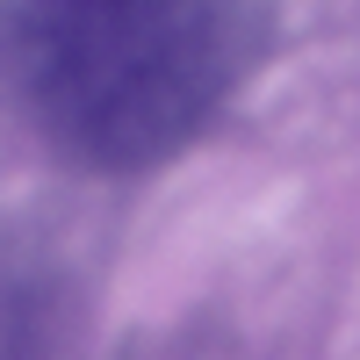

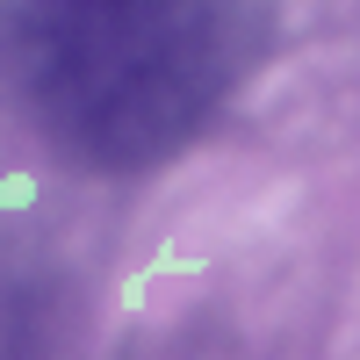

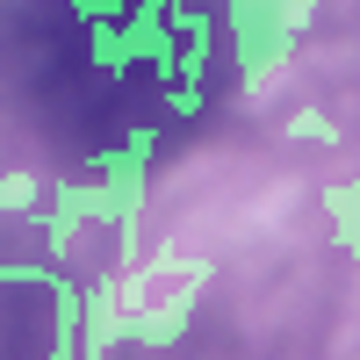

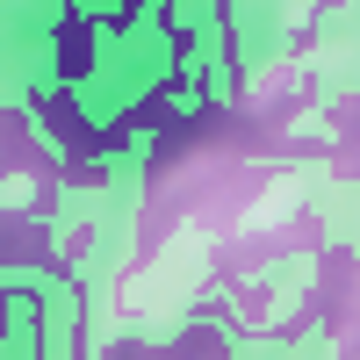

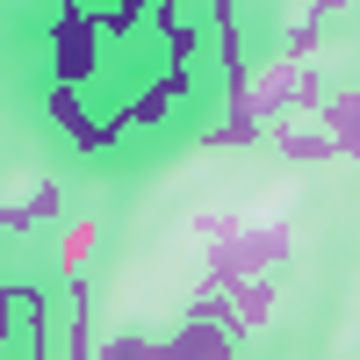

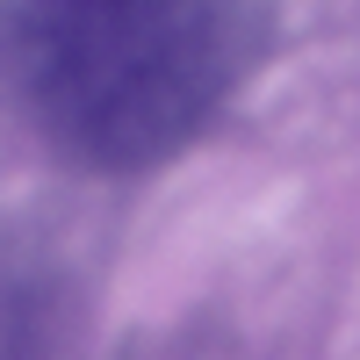

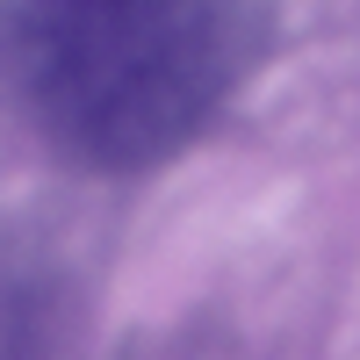

file: Case_12-10.tif, sample: 407


  0%|          | 0/300 [00:00<?, ?it/s]

1/1 [==============================] - 0s 86ms/step
{0: [(26, 0.0004247683333279727), (18, 0.0004191736187233089), (68, 0.000384555651791219), (42, 0.00037333439625039406), (64, 0.0003698077745619165), (17, 0.0003658785380747893), (59, 0.00036478215410853547), (76, 0.0003597092899072694), (22, 0.0003515143053146316), (58, 0.0003491814489471175), (37, 0.0003446018955745726), (24, 0.0003425148480545245), (35, 0.0003365481540828677), (47, 0.00033556498154808576), (55, 0.00031995165546626044), (27, 0.00031128638446026395), (72, 0.0003088178264837571), (4, 0.00030730735672417455), (34, 0.0003057369233017091), (39, 0.00030170085879128647), (38, 0.0002911907067434533), (9, 0.00028754067848117606), (75, 0.0002865994491713401), (33, 0.000283792977159746), (67, 0.0002825562156357127), (62, 0.0002819429143293549), (70, 0.00028009204474572006), (50, 0.0002793641851326426), (2, 0.0002780014987755429), (40, 0.0002710858627906581), (65, 0.0002682547618414534), (11, 0.0002659699746134261), (66, 0.0002

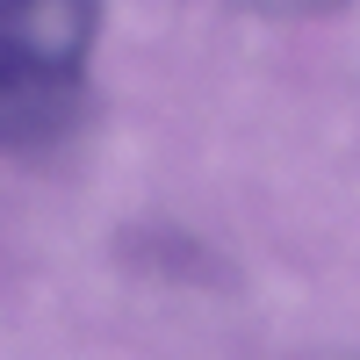

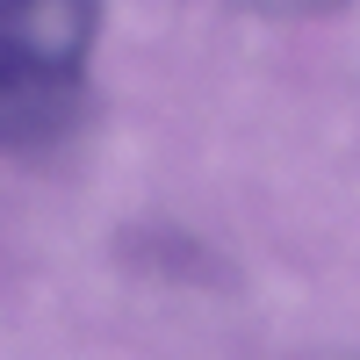

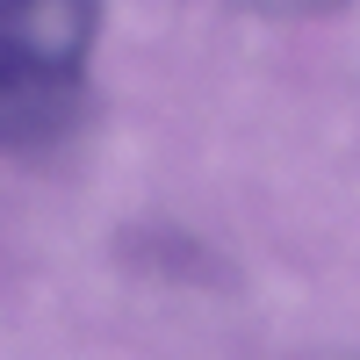

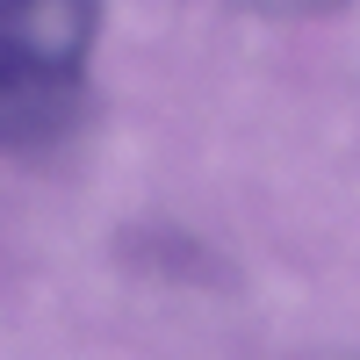

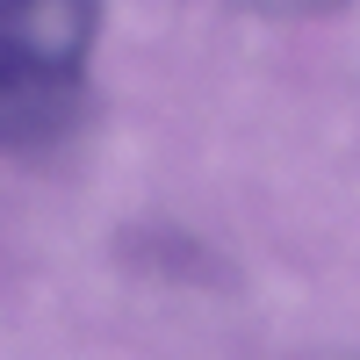

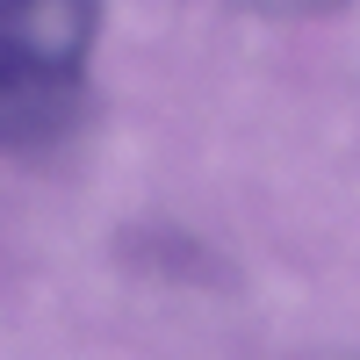

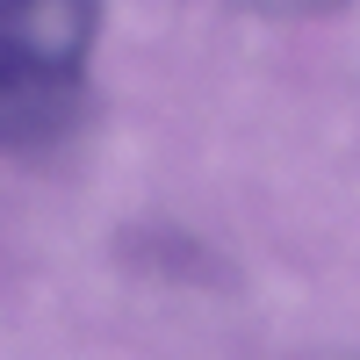

In [2]:
analyzer.explain_tagged_files(10, 0.001, 300)